In [2]:
## import the libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pickle

# Dictionary to map teams to colors
team_colors = {
    'India': 'navy',
    'Australia': 'yellow',
    'England': 'cornflowerblue',
    'Bangladesh' : 'darkgreen',
    'Pakistan' : 'lime',
    'Afghanistan':'blue',
    'Netherlands':'orange',
    'NewZealand': 'grey',
    'SouthAfrica':'gold',
    'SriLanka':'dodgerblue',
    'Oman':'darkred',
    'Nepal':'skyblue',
    'Papua_New_Ginuea':'goldenrod',
    'Papua_New_Guinea':'goldenrod',
    'Ireland':'lawngreen',
    'Namibia':'deepskyblue',  
    'Jersey':'indigo',  
    'Scotland':'lightsteelblue',
    'USA':'cyan',
    'UAE':'lightslategrey',
    'Canada':'red',
    'WestIndies':'maroon',
    'Zimbabwe':'tomato',
    'tied':'black',
    'no result':'black'
}

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Load dataset
all_squad = pd.read_csv('all_squad.csv')
all_squad.head()

FileNotFoundError: [Errno 2] No such file or directory: 'all_squad.csv'

In [ ]:
## Load dataset
all_batters = pd.read_csv('all_batters.csv')
all_batters.head()

,Unnamed: 0,Player,Mat,Inns,NO,Runs,BF,HS,Ave,SR,100,50,0,4s,6s,Country,Type
0,0,AC Agar,2,2,1,65,90,48*,65.00,72.22,-,-,-,3,2,Australia,batting
1,1,TM Head,13,13,2,570,428,137,51.81,133.17,2,3,1,74,21,Australia,batting
2,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,2,-,1,41,22,Australia,batting
3,3,MR Marsh,20,20,2,858,753,177*,47.66,113.94,2,5,3,96,43,Australia,batting
4,4,DA Warner,20,20,0,925,821,163,46.25,112.66,3,6,1,95,38,Australia,batting


In [ ]:
## Load dataset
all_bowlers = pd.read_csv('all_bowlers.csv')
all_bowlers.head(10)

,Unnamed: 0,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,5,10,Ct,St,Country,Type
0,0,TH David,2023-2023,4,1,2.0,-,20,1,1/20,20.00,10.00,12.0,-,-,-,-,Australia,bowling
1,1,A Zampa,2023-2023,20,20,173.0,4,1000,38,4/8,26.31,5.78,27.3,-,-,2,-,Australia,bowling
2,2,AC Agar,2023-2023,2,2,19.0,-,81,3,2/41,27.00,4.26,38.0,-,-,-,-,Australia,bowling
3,3,MA Starc,2023-2023,14,14,121.5,3,750,25,5/53,30.00,6.15,29.2,1,-,7,-,Australia,bowling
4,4,AM Hardie,2023-2023,1,1,10.0,-,62,2,2/62,31.00,6.20,30.0,-,-,-,-,Australia,bowling
5,5,JR Hazlewood,2023-2023,16,16,140.1,10,747,24,3/38,31.12,5.32,35.0,-,-,5,-,Australia,bowling
6,6,NT Ellis,2023-2023,5,5,41.0,1,242,7,2/13,34.57,5.90,35.1,-,-,2,-,Australia,bowling
7,7,PJ Cummins,2023-2023,13,13,107.3,1,618,17,3/51,36.35,5.74,37.9,-,-,5,-,Australia,bowling
8,8,MP Stoinis,2023-2023,13,12,66.1,2,412,11,2/20,37.45,6.22,36.0,-,-,4,-,Australia,bowling
9,9,SA Abbott,2023-2023,10,10,84.3,2,487,13,3/23,37.46,5.76,39.0,-,-,5,-,Australia,bowling


In [6]:
## load dataset
Match_Results = pd.read_csv('Match_Results.csv')
Match_Results.head()

,Unnamed: 0,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,0,Pakistan,New Zealand,Pakistan,6 wickets,Karachi,"Jan 9, 2023",ODI # 4500
1,1,India,Sri Lanka,India,67 runs,Guwahati,"Jan 10, 2023",ODI # 4501
2,2,Pakistan,New Zealand,New Zealand,79 runs,Karachi,"Jan 11, 2023",ODI # 4502
3,3,India,Sri Lanka,India,4 wickets,Eden Gardens,"Jan 12, 2023",ODI # 4503
4,4,Pakistan,New Zealand,New Zealand,2 wickets,Karachi,"Jan 13, 2023",ODI # 4504


In [62]:
Match_Results.head()

,Unnamed: 0,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wins
0,0,Pakistan,NewZealand,Pakistan,6 wickets,Karachi,"Jan 9, 2023",ODI # 4500,14
1,1,India,SriLanka,India,67 runs,Guwahati,"Jan 10, 2023",ODI # 4501,25
2,2,Pakistan,NewZealand,NewZealand,79 runs,Karachi,"Jan 11, 2023",ODI # 4502,13
3,3,India,SriLanka,India,4 wickets,Eden Gardens,"Jan 12, 2023",ODI # 4503,25
4,4,Pakistan,NewZealand,NewZealand,2 wickets,Karachi,"Jan 13, 2023",ODI # 4504,13


In [8]:
print('all_squad',all_squad.columns)
print('all_batters',all_batters.columns)
print('all_bowlers',all_bowlers.columns)
print('Match_Results',Match_Results.columns)

all_squad Index(['Unnamed: 0', 'Name', 'Age', 'Batting style', 'Bowling style', 'Role',
       'Country'],
      dtype='object')
all_batters Index(['Unnamed: 0', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'BF', 'HS', 'Ave',
       'SR', '100', '50', '0', '4s', '6s', 'Country', 'Type'],
      dtype='object')
all_bowlers Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'Overs', 'Mdns', 'Runs',
       'Wkts', 'BBI', 'Ave', 'Econ', 'SR', '5', '10', 'Ct', 'St', 'Country',
       'Type'],
      dtype='object')
Match_Results Index(['Unnamed: 0', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date', 'Scorecard', 'Wins'],
      dtype='object')


## Data Cleaning

In [9]:
all_squad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     609 non-null    int64 
 1   Name           522 non-null    object
 2   Age            499 non-null    object
 3   Batting style  522 non-null    object
 4   Bowling style  517 non-null    object
 5   Role           522 non-null    object
 6   Country        522 non-null    object
dtypes: int64(1), object(6)
memory usage: 33.4+ KB


In [10]:
all_squad['Bowling style'].value_counts()

—                           64
Right-arm off break         63
Right-arm medium            59
Slow left-arm orthodox      58
Right-arm medium-fast       42
Right-arm leg break         28
Right-arm fast              26
Right-arm fast-medium       21
Right-arm off spin          20
Right-arm leg spin          13
Left-arm medium             11
Left-arm medium-fast        10
Left-arm orthodox            9
Right arm off break          9
–                            7
Left-arm fast-medium         6
RFM                          5
Right-arm medium fast        5
Right-arm offbreak           4
Right-arm off-break          4
LB                           3
SLO                          3
Right-arm leg-break          3
Slow left-arm unorthodox     3
OB                           3
Left-arm orthodox spin       3
Left-arm fast                3
Right arm medium             2
ODI, T20I                    2
RF                           2
-                            2
Right-arm Leg break          2
Left-arm

In [11]:
# Remove hyphens and perform multiple replacements in 'Bowling style'
all_squad['Bowling style'] = all_squad['Bowling style'].str.replace('-', ' ') \
                                                          .str.replace('RFM', 'Right arm fast medium') \
                                                          .str.replace('Right arm Fast medium', 'Right arm fast medium') \
                                                          .str.replace('LFM', 'Left arm fast medium') \
                                                          .str.replace('LB', 'Leg break') \
                                                          .str.replace('OB', 'Off break') \
                                                          .str.replace('–', 'Other') \
                                                          .str.replace('—', 'Other') \
                                                          .str.replace('SLO', 'Slow left arm orthodox') \
                                                          .str.replace('RM', 'Right arm medium') \
                                                          .str.replace('RF', 'Right arm fast') 
                                                          

# Display the unique counts after modification
unique_counts = all_squad['Bowling style'].value_counts()
print(unique_counts)


Right arm off break         76
Other                       71
Right arm medium            62
Slow left arm orthodox      61
Right arm medium fast       48
Right arm fast medium       31
Right arm leg break         31
Right arm fast              28
Right arm off spin          21
Right arm leg spin          13
Left arm medium fast        12
Left arm medium             11
Left arm orthodox            9
Left arm fast medium         9
Right arm offbreak           4
Off break                    3
Slow left arm unorthodox     3
Left arm orthodox spin       3
Leg break                    3
Left arm fast                3
                             2
Right arm Leg break          2
ODI, T20I                    2
Right arm Fast               1
Left arm unorthodox          1
Left arm fast mediun         1
Spin Bowlers                 1
Pace Bowlers                 1
Wicket keepers               1
Left arm unorthodox spin     1
Left arm off break           1
All rounders                 1
Name: Bo

In [12]:
# Define a mapping dictionary for left or right arm
arm_mapping = {
    'Right arm off break': 'Right',
    'Slow left arm orthodox': 'Left',
    'Right arm medium': 'Right',
    'Right arm medium fast': 'Right',
    'Right arm fast medium': 'Right',
    'Right arm leg break': 'Right',
    'Right arm fast': 'Right',
    'Right arm off spin': 'Right',
    'Right arm leg spin': 'Right',
    'Left arm medium fast': 'Left',
    'Left arm medium': 'Left',
    'Left arm fast medium': 'Left',
    'Left arm orthodox': 'Left',
    'Right arm offbreak': 'Right',
    'Off break': 'Right',
    'Slow left arm unorthodox': 'Left',
    'Left arm orthodox spin': 'Left',
    'Left arm fast': 'Left',
    'Leg break': 'Right',
    'Right arm Leg break': 'Right',
    'Left arm unorthodox spin': 'Left',
    'Left arm off break': 'Left',
    'RM': 'Right',
    'All rounders':'N/A',
    'Wicket keepers':'N/A',
    'ODI, T20I':'N/A',
    'Right arm Fast': 'Right',
    'Left arm unorthodox': 'Left',
    'Left arm fast mediun': 'Left',
    'Pace Bowlers': 'Right',
    'Spin Bowlers': 'Right',
}

# Create a new column 'Arm' based on the mapping
all_squad['Arm'] = all_squad['Bowling style'].replace(arm_mapping)

# Display the unique counts for the new column
arm_counts = all_squad['Arm'].value_counts()
print(arm_counts)


Right    325
Left     115
Other     71
N/A        4
           2
Name: Arm, dtype: int64


In [13]:
# Define a mapping dictionary for consolidation
bowling_style_mapping = {
    'Right arm off break': 'Off break',
    'Slow left arm orthodox': 'Slow left arm',
    'Right arm medium': 'Medium',
    'Right arm medium fast': 'Fast medium',
    'Right arm fast medium': 'Fast medium',
    'Right arm leg break': 'Leg break',
    'Right arm fast': 'Fast',
    'Right arm off spin': 'Off spin',
    'Right arm leg spin': 'Leg spin',
    'Left arm medium fast': 'Fast medium',
    'Left arm medium': 'Medium',
    'Left arm fast medium': 'Fast medium',
    'Left arm orthodox': 'Orthodox',
    'Right arm offbreak': 'Off break',
    'Off break': 'Off break',
    'Slow left arm unorthodox': 'Slow left arm',
    'Left arm orthodox spin': 'Orthodox spin',
    'Spin Bowlers': 'Orthodox spin',
    'Left arm fast': 'Fast',
    'Leg break': 'Leg break',
    'Right arm Leg break': 'Leg break',
    'Left arm unorthodox spin': 'Unorthodox spin',
    'Left arm off break': 'Off break',
    'RM': 'Medium',
    'Right arm Fast': 'Fast',
    'Left arm unorthodox': 'Spin',
    'Pace Bowlers': 'Fast',
    'Slow left arm':'Slow',
    'Left arm fast mediun':'Fast medium',
    'Orthodox spin':'Spin',
    'Orthodox spin':'Spin',
    'Unorthodox spin':'Spin',
    'Off spin':'Spin',
    'Leg spin':'Spin',
    'Wicket keepers':'Other',
    'All rounders':'Other',
    'ODI, T20I':'Other'
}

# Create a new column 'Consolidated_Bowling_Style' based on the mapping
all_squad['Consolidated_Bowling_Style'] = all_squad['Bowling style'].replace(bowling_style_mapping)

# Display the updated unique counts for the new column
consolidated_style_counts = all_squad['Consolidated_Bowling_Style'].value_counts()
print(consolidated_style_counts)


Fast medium        101
Off break           84
Other               75
Medium              73
Slow left arm       64
Leg break           36
Fast                33
Off spin            21
Leg spin            13
Orthodox             9
Orthodox spin        4
                     2
Unorthodox spin      1
Spin                 1
Name: Consolidated_Bowling_Style, dtype: int64


In [14]:
all_squad['Batting style'].value_counts()

Right-handed      364
Left-handed       128
Right              15
Left               11
All-rounders        1
Wicket-keepers      1
Pace Bowlers        1
Spin Bowlers        1
Name: Batting style, dtype: int64

In [15]:
# Replace 'Right' with 'Right-handed' and 'Left' with 'Left-handed' in the 'Arm' column
all_squad['Batting style'] = all_squad['Batting style'].replace({'Right': 'Right-handed', 'Left': 'Left-handed','All-rounders':'N/A','Spin Bowlers':'N/A','Pace Bowlers':'N/A','Wicket-keepers':'N/A'})

# Verify the changes
print(all_squad['Batting style'].value_counts())


Right-handed    379
Left-handed     139
N/A               4
Name: Batting style, dtype: int64


In [16]:
all_squad.isnull().sum()/len(all_squad)*100

Unnamed: 0                     0.000000
Name                          14.285714
Age                           18.062397
Batting style                 14.285714
Bowling style                 15.106732
Role                          14.285714
Country                       14.285714
Arm                           15.106732
Consolidated_Bowling_Style    15.106732
dtype: float64

In [17]:
all_batters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  442 non-null    int64  
 1   Player      442 non-null    object 
 2   Mat         442 non-null    int64  
 3   Inns        442 non-null    object 
 4   NO          442 non-null    int64  
 5   Runs        442 non-null    int64  
 6   BF          442 non-null    int64  
 7   HS          442 non-null    object 
 8   Ave         442 non-null    object 
 9   SR          442 non-null    float64
 10  100         442 non-null    object 
 11  50          442 non-null    object 
 12  0           442 non-null    object 
 13  4s          442 non-null    int64  
 14  6s          442 non-null    int64  
 15  Country     442 non-null    object 
 16  Type        427 non-null    object 
dtypes: float64(1), int64(7), object(9)
memory usage: 58.8+ KB


In [18]:
all_batters.isnull().sum()/len(all_batters)*100

Unnamed: 0    0.000000
Player        0.000000
Mat           0.000000
Inns          0.000000
NO            0.000000
Runs          0.000000
BF            0.000000
HS            0.000000
Ave           0.000000
SR            0.000000
100           0.000000
50            0.000000
0             0.000000
4s            0.000000
6s            0.000000
Country       0.000000
Type          3.393665
dtype: float64

In [19]:
all_bowlers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  442 non-null    int64  
 1   Player      442 non-null    object 
 2   Span        442 non-null    object 
 3   Mat         442 non-null    int64  
 4   Inns        442 non-null    object 
 5   Overs       442 non-null    float64
 6   Mdns        442 non-null    object 
 7   Runs        442 non-null    object 
 8   Wkts        442 non-null    int64  
 9   BBI         442 non-null    object 
 10  Ave         442 non-null    object 
 11  Econ        442 non-null    object 
 12  SR          442 non-null    object 
 13  5           442 non-null    object 
 14  10          442 non-null    object 
 15  Ct          442 non-null    object 
 16  St          442 non-null    object 
 17  Country     442 non-null    object 
 18  Type        442 non-null    object 
dtypes: float64(1), int64(3), obje

In [20]:
all_bowlers.isnull().sum()/len(all_bowlers)*100

Unnamed: 0    0.0
Player        0.0
Span          0.0
Mat           0.0
Inns          0.0
Overs         0.0
Mdns          0.0
Runs          0.0
Wkts          0.0
BBI           0.0
Ave           0.0
Econ          0.0
SR            0.0
5             0.0
10            0.0
Ct            0.0
St            0.0
Country       0.0
Type          0.0
dtype: float64

In [21]:
Match_Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  206 non-null    int64 
 1   Team 1      206 non-null    object
 2   Team 2      206 non-null    object
 3   Winner      206 non-null    object
 4   Margin      206 non-null    object
 5   Ground      206 non-null    object
 6   Match Date  206 non-null    object
 7   Scorecard   206 non-null    object
 8   Wins        206 non-null    int32 
dtypes: int32(1), int64(1), object(7)
memory usage: 13.8+ KB


In [22]:
Match_Results.isnull().sum()/len(Match_Results)*100

Unnamed: 0    0.0
Team 1        0.0
Team 2        0.0
Winner        0.0
Margin        0.0
Ground        0.0
Match Date    0.0
Scorecard     0.0
Wins          0.0
dtype: float64

In [23]:
Match_Results.replace({'New Zealand': 'NewZealand', 'U.S.A.': 'USA', 'West Indies': 'WestIndies','Sri Lanka':'SriLanka','U.A.E.':'UAE','South Africa':'SouthAfrica','P.N.G.':'Papua_New_Ginuea'}, inplace=True)


In [24]:
Match_Results['Winner'].value_counts()

India               25
SriLanka            16
SouthAfrica         15
Nepal               15
Australia           14
Pakistan            14
NewZealand          13
England             10
Bangladesh          10
UAE                  9
Zimbabwe             8
WestIndies           8
Afghanistan          7
Netherlands          7
Scotland             7
no result            6
Ireland              4
Namibia              4
USA                  4
Papua_New_Ginuea     3
Canada               3
Oman                 2
Jersey               1
tied                 1
Name: Winner, dtype: int64

In [25]:
def find_best_match(name, dataset):
    matches = process.extractOne(name, dataset['Name'])
    return matches[0] if matches[1] >= 80 else None

# Apply the function to create new columns 'Matched_Name' in all_bowlers and all_batters
all_bowlers['Matched_Name'] = all_bowlers['Player'].apply(lambda x: find_best_match(x, all_squad))
all_batters['Matched_Name'] = all_batters['Player'].apply(lambda x: find_best_match(x, all_squad))

# Merge all_bowlers with all_squad
merged_bowlers_squad = pd.merge(all_bowlers, all_squad, left_on='Matched_Name', right_on='Name', how='left')

# Merge all_batters with all_squad
merged_batters_squad = pd.merge(all_batters, all_squad, left_on='Matched_Name', right_on='Name', how='left')

# Drop the intermediate 'Matched_Name' columns if needed
merged_bowlers_squad = merged_bowlers_squad.drop(columns=['Matched_Name'])
merged_batters_squad = merged_batters_squad.drop(columns=['Matched_Name'])

# Display the merged datasets
print(merged_bowlers_squad)
print(merged_batters_squad)


       Unnamed: 0_x     Player       Span  Mat Inns  Overs Mdns  Runs  Wkts  \
0                 0   TH David  2023-2023    4    1    2.0    -    20     1   
1                 1    A Zampa  2023-2023   20   20  173.0    4  1000    38   
2                 2    AC Agar  2023-2023    2    2   19.0    -    81     3   
3                 3   MA Starc  2023-2023   14   14  121.5    3   750    25   
4                 4  AM Hardie  2023-2023    1    1   10.0    -    62     2   
...             ...        ...        ...  ...  ...    ...  ...   ...   ...   
10929           441   R Powell  2023-2023    6    -    0.0    -     -     0   
10930           441   R Powell  2023-2023    6    -    0.0    -     -     0   
10931           441   R Powell  2023-2023    6    -    0.0    -     -     0   
10932           441   R Powell  2023-2023    6    -    0.0    -     -     0   
10933           441   R Powell  2023-2023    6    -    0.0    -     -     0   

        BBI  ...     Type Unnamed: 0_y            N

In [26]:
merged_batters_squad.head(20)

,Unnamed: 0_x,Player,Mat,Inns,NO,Runs,BF,HS,Ave,SR,...,Type,Unnamed: 0_y,Name,Age,Batting style,Bowling style,Role,Country_y,Arm,Consolidated_Bowling_Style
0,0,AC Agar,2,2,1,65,90,48*,65.00,72.22,...,batting,64,Ashton Agar,30,Left-handed,Slow left arm orthodox,Pace Bowler,Australia,Left,Slow left arm
1,1,TM Head,13,13,2,570,428,137,51.81,133.17,...,batting,36,Travis Head,29,Left-handed,Right arm off break,Batters,Australia,Right,Off break
2,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,...,batting,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,...,batting,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,...,batting,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,...,batting,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,...,batting,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,...,batting,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,...,batting,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,GJ Maxwell,11,11,3,413,283,201*,51.62,145.93,...,batting,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Combine the DataFrames along the rows
combined_data = pd.concat([merged_bowlers_squad, merged_batters_squad,Match_Results], ignore_index=True)

combined_data.head()


,Unnamed: 0_x,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,...,6s,Unnamed: 0,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wins
0,0.0,TH David,2023-2023,4.0,1,2.0,-,20,1.0,1/20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,A Zampa,2023-2023,20.0,20,173.0,4,1000,38.0,4/8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,AC Agar,2023-2023,2.0,2,19.0,-,81,3.0,2/41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,MA Starc,2023-2023,14.0,14,121.5,3,750,25.0,5/53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,AM Hardie,2023-2023,1.0,1,10.0,-,62,2.0,2/62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
combined_data.columns


Index(['Unnamed: 0_x', 'Player', 'Span', 'Mat', 'Inns', 'Overs', 'Mdns',
       'Runs', 'Wkts', 'BBI', 'Ave', 'Econ', 'SR', '5', '10', 'Ct', 'St',
       'Country_x', 'Type', 'Unnamed: 0_y', 'Name', 'Age', 'Batting style',
       'Bowling style', 'Role', 'Country_y', 'Arm',
       'Consolidated_Bowling_Style', 'NO', 'BF', 'HS', '100', '50', '0', '4s',
       '6s', 'Unnamed: 0', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date', 'Scorecard', 'Wins'],
      dtype='object')

In [29]:
combined_data['Country'] = np.where(combined_data['Country_y'] == combined_data['Country_x'], combined_data['Country_y'], None)

# Drop the original 'Country_y' and 'Country_x' columns
combined_data = combined_data.drop(columns=['Country_y', 'Country_x'])


In [30]:
combined_data['Country'].value_counts()

Bangladesh     50
India          44
Pakistan       42
Afghanistan    42
Netherlands    34
Australia      32
NewZealand     32
SouthAfrica    32
SriLanka       28
Oman           28
Nepal          28
Ireland        26
Namibia        24
Jersey         24
Scotland       24
USA            24
Canada         18
Name: Country, dtype: int64

In [31]:
rows_with_empty_country = combined_data[combined_data['Country'].isnull()]

print(rows_with_empty_country)


       Unnamed: 0_x     Player       Span  Mat Inns  Overs Mdns Runs  Wkts  \
4               4.0  AM Hardie  2023-2023  1.0    1   10.0    -   62   2.0   
5               4.0  AM Hardie  2023-2023  1.0    1   10.0    -   62   2.0   
6               4.0  AM Hardie  2023-2023  1.0    1   10.0    -   62   2.0   
7               4.0  AM Hardie  2023-2023  1.0    1   10.0    -   62   2.0   
8               4.0  AM Hardie  2023-2023  1.0    1   10.0    -   62   2.0   
...             ...        ...        ...  ...  ...    ...  ...  ...   ...   
22069           NaN        NaN        NaN  NaN  NaN    NaN  NaN  NaN   NaN   
22070           NaN        NaN        NaN  NaN  NaN    NaN  NaN  NaN   NaN   
22071           NaN        NaN        NaN  NaN  NaN    NaN  NaN  NaN   NaN   
22072           NaN        NaN        NaN  NaN  NaN    NaN  NaN  NaN   NaN   
22073           NaN        NaN        NaN  NaN  NaN    NaN  NaN  NaN   NaN   

        BBI  ... Unnamed: 0     Team 1       Team 2     Winner 

In [32]:
combined_data.loc[combined_data['Player'] == 'RG Sharma', 'Country'] = 'India'
combined_data.loc[combined_data['Player'] == 'DJ Mitchell', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'SO Hetmyer', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'DC Drakes', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'JNT Seales', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'G Motie', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'Akeem Jordan', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'AM Hardie', 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == 'Y Cariah', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'KAR Hodge', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'AS Joseph', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'MP Stoinis', 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == 'GJ Maxwell', 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == 'MR Marsh', 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == 'MW Short', 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == 'Taijul Islam', 'Country'] = 'Bangladesh'
combined_data.loc[combined_data['Player'] == 'AJ Hosein', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'RA Reifer', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'R Shepherd', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'Shakib Al Hasan', 'Country'] = 'Bangladesh'
combined_data.loc[combined_data['Player'] == 'Mrittunjoy Chowdhury', 'Country'] = 'Bangladesh'
combined_data.loc[combined_data['Player'] == 'JOA Gordon', 'Country'] = 'Canada'
combined_data.loc[combined_data['Player'] == 'H Thaker', 'Country'] = 'Canadan'
combined_data.loc[combined_data['Player'] == 'JC Archer', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'DJ Willey', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'MJ Potts', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'Rehan Ahmed', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'GLS Scrimshaw', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'N Pooran', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'RJW Topley', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'CR Woakes', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'SM Curran', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'OP Stone', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'AU Rashid', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'LS Livingstone', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'MM Ali', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'BA Carse', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'AAP Atkinson', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'MA Wood', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'SD Hope', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'WG Jacks', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'JE Root', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'S Mahmood', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'TW Hartley', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'HH Pandya', 'Country'] = 'India'
combined_data.loc[combined_data['Player'] == 'Chirag Suri', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'BA King', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'TF van Woerkom', 'Country'] = 'Ireland'
combined_data.loc[combined_data['Player'] == 'GJ Delany', 'Country'] = 'Ireland'
combined_data.loc[combined_data['Player'] == 'HT Tector', 'Country'] = 'Ireland'
combined_data.loc[combined_data['Player'] == 'EJB Miles', 'Country'] = 'Jersey'
combined_data.loc[combined_data['Player'] == 'S Fouche', 'Country'] = 'Namibia'
combined_data.loc[combined_data['Player'] == "EC D'Souza", 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Lovepreet Singh', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'J Charles', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'SSJ Brooks', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'BM Scholtz', 'Country'] = 'Namibia'
combined_data.loc[combined_data['Player'] == 'K Mahato', 'Country'] = 'Nepal'
combined_data.loc[combined_data['Player'] == 'RK Paudel', 'Country'] = 'Nepal'
combined_data.loc[combined_data['Player'] == 'BFW de Leede', 'Country'] = 'Netherlands'
combined_data.loc[combined_data['Player'] == 'LV van Beek', 'Country'] = 'Netherlands'
combined_data.loc[combined_data['Player'] == "A Sharma", 'Country'] = 'India'
combined_data.loc[combined_data['Player'] == 'AC Valthapa', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Ansh Tandon', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'A Sharafu', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'R Powell', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'VJ Kingma', 'Country'] = 'Netherlands'
combined_data.loc[combined_data['Player'] == 'AF Milne', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'HB Shipley', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'TA Boult', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'R Ravindra', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == "KNA Bandara", 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'MD Patel', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'Asif Khan', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'V Aravind', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'CP Rizwan', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'BM Tickner', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'KA Jamieson', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'Mohammad Hasnain', 'Country'] = 'Pakistan'
combined_data.loc[combined_data['Player'] == 'SI Kamea', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'R Hekure', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == "KJ Coetzer", 'Country'] = 'Scotland'
combined_data.loc[combined_data['Player'] == 'LR Naylor', 'Country'] = 'Scotland'
combined_data.loc[combined_data['Player'] == 'BKG Mendis', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'MDKJ Perera', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'WIA Fernando', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'J Kariko', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'A Vala', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'CA Soper', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'KV Morea', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'S Bau', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == "K Doriga", 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'H Hiri', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'G Toka', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'HGV Vare', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'HG Munsey', 'Country'] = 'Scotland'
combined_data.loc[combined_data['Player'] == 'N Vanua', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'A Nao', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'CJA Amini', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'CN Greaves', 'Country'] = 'Scotland'
combined_data.loc[combined_data['Player'] == 'CB Sole', 'Country'] = 'Scotland'
combined_data.loc[combined_data['Player'] == "CJ Bowes", 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'AA Shafique', 'Country'] = 'Pakistan'
combined_data.loc[combined_data['Player'] == 'Haris Sohail', 'Country'] = 'Pakistan'
combined_data.loc[combined_data['Player'] == 'Kamran Ghulam', 'Country'] = 'Pakistan'
combined_data.loc[combined_data['Player'] == 'TP Ura', 'Country'] = 'Papua_New_Guinea'
combined_data.loc[combined_data['Player'] == 'SSB Magala', 'Country'] = 'SouthAfrica'
combined_data.loc[combined_data['Player'] == 'BC Fortuin', 'Country'] = 'SouthAfrica'
combined_data.loc[combined_data['Player'] == 'K Rabada', 'Country'] = 'SouthAfrica'
combined_data.loc[combined_data['Player'] == 'L Ngidi', 'Country'] = 'SouthAfrica'
combined_data.loc[combined_data['Player'] == 'AK Markram', 'Country'] = 'SouthAfrica'
combined_data.loc[combined_data['Player'] == "NRJ Croes", 'Country'] = 'Netherlands'
combined_data.loc[combined_data['Player'] == 'DP Conway', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'WA Young', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'TWM Latham', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'FH Allen', 'Country'] = 'NewZealand'
combined_data.loc[combined_data['Player'] == 'WD Parnell', 'Country'] = 'SouthAfrica'
combined_data.loc[combined_data['Player'] == 'KIC Asalanka', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'AD Mathews', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'CBRLS Kumara', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'MD Shanaka', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == "CAK Rajitha", 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'MADI Hemantha', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'MNK Fernando', 'Country'] = 'SriLanka'
combined_data.loc[combined_data['Player'] == 'G Singh', 'Country'] = 'India'
combined_data.loc[combined_data['Player'] == 'SR Taylor', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'Sabir Ali', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Hazrat Bilal', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'SM Sharma', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Zahoor Khan', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Junaid Siddique', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == "KP Meiyappan", 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Aayan Afzal Khan', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Rohan Mustafa', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Zawar Farid', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Matiullah Khan', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Basil Hameed', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Ali Naseer', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Muhammad Jawadullah', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Aryan Lakra', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'RN Bhatia', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Adhitya Shetty', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == "Rameez Shahzad", 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'Muhammad Waseem', 'Country'] = 'UAE'
combined_data.loc[combined_data['Player'] == 'K Sinclair', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'KMA Paul', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'OF Smith', 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == 'KR Mayers', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'RL Chase', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'JO Holder', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'KU Carty', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'A Athanaze', 'Country'] = 'WestIndies'
combined_data.loc[combined_data['Player'] == 'SPD Smith', 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == "AT Carey", 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == 'A Johnson', 'Country'] = 'Australia'
combined_data.loc[combined_data['Player'] == 'BA Stokes', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'DJ Malan', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'SR Hain', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'Mohammad Naim', 'Country'] = 'Bangladesh'
combined_data.loc[combined_data['Player'] == 'JJ Roy', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'BM Duckett', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'JC Buttler', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'PD Salt', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'Z Crawley', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'HC Brook', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == "JM Bairstow", 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'JM Vince', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'JL Smith', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'L Wood', 'Country'] = 'England'
combined_data.loc[combined_data['Player'] == 'SV Samson', 'Country'] = 'India'
combined_data.loc[combined_data['Player'] == 'SA Edwards', 'Country'] = 'Netherlands'
combined_data.loc[combined_data['Player'] == "ST Doheny", 'Country'] = 'Ireland'
combined_data.loc[combined_data['Player'] == 'LJ Tucker', 'Country'] = 'Ireland'
combined_data.loc[combined_data['Player'] == 'JW Jenner', 'Country'] = 'Jersey'
combined_data.loc[combined_data['Player'] == 'JN Frylinck', 'Country'] = 'Namibia'
combined_data.loc[combined_data['Player'] == 'S Jora', 'Country'] = 'Nepal'


combined_data['Country'] = combined_data['Country'].replace('Canadan', 'Canada')

In [33]:
combined_data = combined_data.drop_duplicates(subset='Player', keep='first')


In [34]:
players_with_empty_country = combined_data.loc[combined_data['Country'].isnull(), 'Player']
print(players_with_empty_country)


21868    NaN
Name: Player, dtype: object


In [35]:
combined_data.loc[combined_data['Player'] == 'MP Stoinis', 'Age'] = '34'
combined_data.loc[combined_data['Player'] == 'AM Hardie', 'Age'] = '24'
combined_data.loc[combined_data['Player'] == 'GJ Maxwell', 'Age'] = '35'
combined_data.loc[combined_data['Player'] == 'MR Marsh', 'Age'] = '32'
combined_data.loc[combined_data['Player'] == 'MW Short', 'Age'] = '28'
combined_data.loc[combined_data['Player'] == 'Taijul Islam', 'Age'] = '31'
combined_data.loc[combined_data['Player'] == 'Mrittunjoy Chowdhury', 'Age'] = '23'
combined_data.loc[combined_data['Player'] == 'JOA Gordon', 'Age'] = '36'
combined_data.loc[combined_data['Player'] == 'H Thaker', 'Age'] = '26'
combined_data.loc[combined_data['Player'] == 'N Pooran', 'Age'] = '28'
combined_data.loc[combined_data['Player'] == 'BA King', 'Age'] = '28'
combined_data.loc[combined_data['Player'] == 'SSJ Brooks', 'Age'] = '35'
combined_data.loc[combined_data['Player'] == 'R Powell', 'Age'] = '30'
combined_data.loc[combined_data['Player'] == 'SSJ Brooks', 'Age'] = '26'
combined_data.loc[combined_data['Player'] == 'JC Archer', 'Age'] = '28'
combined_data.loc[combined_data['Player'] == 'GLS Scrimshaw', 'Age'] = '25'
combined_data.loc[combined_data['Player'] == 'Rehan Ahmed', 'Age'] = '19'
combined_data.loc[combined_data['Player'] == 'MJ Potts', 'Age'] = '25'
combined_data.loc[combined_data['Player'] == 'DJ Willey', 'Age'] = '33'
combined_data.loc[combined_data['Player'] == "EC D'Souza", 'Age'] = '31'
combined_data.loc[combined_data['Player'] == 'Lovepreet Singh', 'Age'] = '20'
combined_data.loc[combined_data['Player'] == 'Chirag Suri', 'Age'] = '28'
combined_data.loc[combined_data['Player'] == 'SD Hope', 'Age'] = '30'
combined_data.loc[combined_data['Player'] == 'SO Hetmyer', 'Age'] = '26'
combined_data.loc[combined_data['Player'] == 'AU Rashid', 'Age'] = '35'
combined_data.loc[combined_data['Player'] == 'OP Stone', 'Age'] = '30'
combined_data.loc[combined_data['Player'] == 'SM Curran', 'Age'] = '25'
combined_data.loc[combined_data['Player'] == 'CR Woakes', 'Age'] = '34'
combined_data.loc[combined_data['Player'] == 'RJW Topley', 'Age'] = '29'
combined_data.loc[combined_data['Player'] == "BKG Mendis", 'Age'] = '28'
combined_data.loc[combined_data['Player'] == 'MDKJ Perera', 'Age'] = '33'
combined_data.loc[combined_data['Player'] == 'WIA Fernando', 'Age'] = '32'
combined_data.loc[combined_data['Player'] == 'KNA Bandara', 'Age'] = '25'
combined_data.loc[combined_data['Player'] == 'SO Hetmyer', 'Age'] = '26'

combined_data.loc[combined_data['Player'] == 'LS Livingstone', 'Age'] = '30'
combined_data.loc[combined_data['Player'] == 'BA Carse', 'Age'] = '28'
combined_data.loc[combined_data['Player'] == 'AAP Atkinson', 'Age'] = '25'
combined_data.loc[combined_data['Player'] == 'MA Wood', 'Age'] = '33'
combined_data.loc[combined_data['Player'] == 'WG Jacks', 'Age'] = '25'
combined_data.loc[combined_data['Player'] == "TP Ura", 'Age'] = '34'
combined_data.loc[combined_data['Player'] == 'HGV Vare', 'Age'] = '22'
combined_data.loc[combined_data['Player'] == 'HG Munsey', 'Age'] = '30'
combined_data.loc[combined_data['Player'] == 'KJ Coetzer', 'Age'] = '39'
combined_data.loc[combined_data['Player'] == 'LR Naylor', 'Age'] = '22'


In [36]:
players_with_empty_age = combined_data.loc[combined_data['Age'].isnull(), 'Player']
print(players_with_empty_age)

449          AT Carey
537         SPD Smith
2337          JE Root
2424        S Mahmood
2511       TW Hartley
             ...     
10063    Akeem Jordan
10150      JNT Seales
10237        KU Carty
10324      A Athanaze
21868             NaN
Name: Player, Length: 95, dtype: object


In [37]:
combined_data = combined_data[combined_data['Player'] != 'AC Valthapa']


In [38]:
combined_data.shape

(442, 44)

In [39]:
columns_with_nan = ['Wkts', 'Runs', 'Econ', 'SR','Ave'] 
combined_data[columns_with_nan] = combined_data[columns_with_nan].fillna(0)

In [40]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 21868
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0_x                441 non-null    float64
 1   Player                      441 non-null    object 
 2   Span                        441 non-null    object 
 3   Mat                         441 non-null    float64
 4   Inns                        441 non-null    object 
 5   Overs                       441 non-null    float64
 6   Mdns                        441 non-null    object 
 7   Runs                        442 non-null    object 
 8   Wkts                        442 non-null    float64
 9   BBI                         441 non-null    object 
 10  Ave                         442 non-null    object 
 11  Econ                        442 non-null    object 
 12  SR                          442 non-null    object 
 13  5                           441 n

In [41]:
columns_to_drop = ['100','50','0','Match Date', 'Ground','Scorecard','Unnamed: 0_y', 'Unnamed: 0_x','Span','Unnamed: 0','4s','6s','NO']

combined_data = combined_data.drop(columns=columns_to_drop)

In [42]:

win_counts = Match_Results['Winner'].value_counts()

# Map the win counts to the 'Country' column in 'all_squad'
all_squad['Wins'] = all_squad['Country'].map(win_counts).fillna(0).astype(int)

combined_data['Wins'] = combined_data['Country'].map(win_counts).fillna(0).astype(int)


In [43]:
combined_data.shape

(442, 31)

In [44]:
# Replace '-' with NaN and convert numeric columns to numeric type
combined_data_numeric = combined_data.replace('-', np.nan)
combined_data_numeric = combined_data_numeric.apply(pd.to_numeric, errors='ignore')

# Find rows with '-'
rows_with_dash = combined_data_numeric[combined_data_numeric.isin(['-']).any(axis=1)]

# Display rows with '-'
print(rows_with_dash)


Empty DataFrame
Columns: [Player, Mat, Inns, Overs, Mdns, Runs, Wkts, BBI, Ave, Econ, SR, 5, 10, Ct, St, Type, Name, Age, Batting style, Bowling style, Role, Arm, Consolidated_Bowling_Style, BF, HS, Team 1, Team 2, Winner, Margin, Wins, Country]
Index: []

[0 rows x 31 columns]


In [45]:
# Assuming 'your_column' is the column with non-numeric values
combined_data['Runs'] = pd.to_numeric(combined_data['Runs'], errors='coerce')


In [46]:
combined_data.head()

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,...,Arm,Consolidated_Bowling_Style,BF,HS,Team 1,Team 2,Winner,Margin,Wins,Country
0,TH David,4.0,1,2.0,-,20.0,1.0,1/20,20.00,10.00,...,Right,Leg break,NaN,NaN,NaN,NaN,NaN,NaN,14,Australia
1,A Zampa,20.0,20,173.0,4,1000.0,38.0,4/8,26.31,5.78,...,Right,Leg break,NaN,NaN,NaN,NaN,NaN,NaN,14,Australia
2,AC Agar,2.0,2,19.0,-,81.0,3.0,2/41,27.00,4.26,...,Left,Slow left arm,NaN,NaN,NaN,NaN,NaN,NaN,14,Australia
3,MA Starc,14.0,14,121.5,3,750.0,25.0,5/53,30.00,6.15,...,Left,Fast,NaN,NaN,NaN,NaN,NaN,NaN,14,Australia
4,AM Hardie,1.0,1,10.0,-,62.0,2.0,2/62,31.00,6.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,Australia


In [47]:
combined_data.to_csv('combined_data.csv')

## Data Exploration

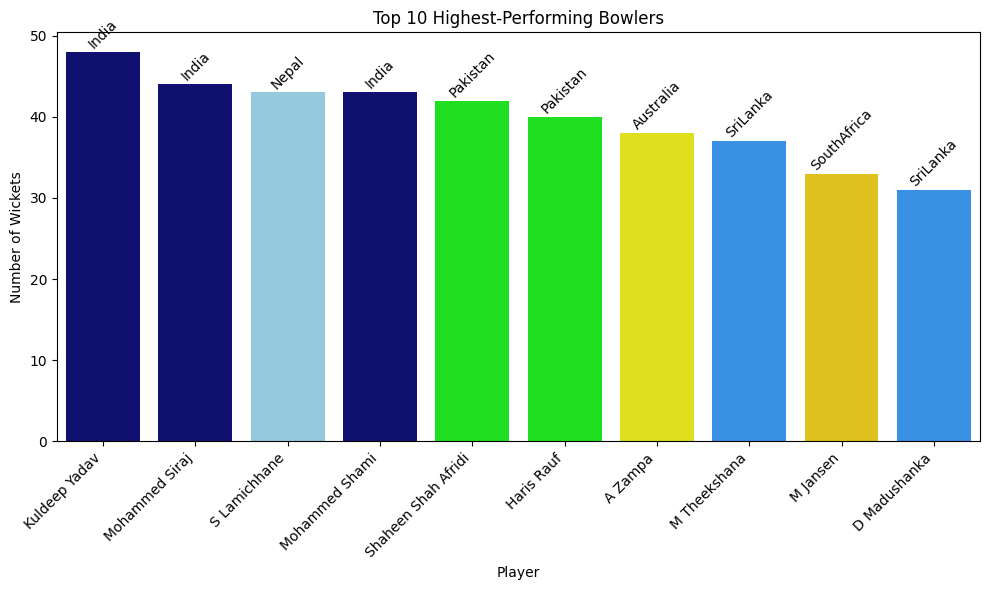

In [48]:
top_bowlers = all_bowlers.sort_values(by='Wkts', ascending=False).head(10)

top_bowlers = all_bowlers.sort_values(by='Wkts', ascending=False).head(10)

colors = [team_colors.get(country, 'gray') for country in top_bowlers['Country']]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Player', y='Wkts', data=top_bowlers, palette=colors)
plt.xlabel('Player')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Highest-Performing Bowlers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

for i, (player, country) in enumerate(zip(top_bowlers['Player'], top_bowlers['Country'])):
    barplot.text(i, top_bowlers['Wkts'].iloc[i] + 0.1, country, ha='center', va='bottom', rotation=45, color='black')

plt.tight_layout()

# Show the plot
plt.show()

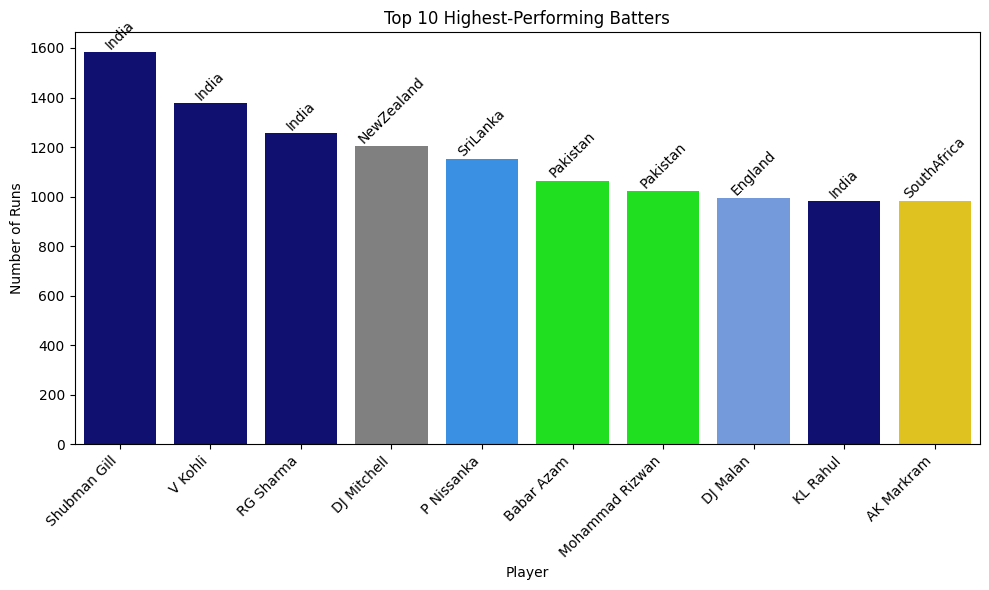

In [49]:


top_batters = all_batters.sort_values(by='Runs', ascending=False).head(10)

colors = [team_colors.get(country, 'gray') for country in top_batters['Country']]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Player', y='Runs', data=top_batters, palette=colors)
plt.xlabel('Player')
plt.ylabel('Number of Runs')
plt.title('Top 10 Highest-Performing Batters')
plt.xticks(rotation=45, ha='right')

for i, (player, country) in enumerate(zip(top_batters['Player'], top_batters['Country'])):
    barplot.text(i, top_batters['Runs'].iloc[i] + 0.1, country, ha='center', va='bottom', rotation=45, color='black')

plt.tight_layout()

# Show the plot
plt.show()



In [1]:

bowlers_info = all_bowlers[['Country', 'Wkts']]  # You can add more columns if needed
batters_info = all_batters[['Country', 'Runs']]  # You can add more columns if needed

# Concatenate bowlers_info and batters_info
combined = pd.concat([bowlers_info, batters_info], ignore_index=True)

# Convert 'Runs' to numeric, replacing non-numeric values with NaN
combined['Runs'] = pd.to_numeric(combined['Runs'], errors='coerce')

# Get the median runs by country
median_runs_by_country = combined.groupby('Country')['Runs'].median().sort_values(ascending=False).index

# Create a boxplot with the specified order
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='Country', y='Runs', data=combined, order=median_runs_by_country)

# Rotate x-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.title('Distribution of Runs by Country (Highest to Lowest Median)')
plt.show()





NameError: name 'all_bowlers' is not defined

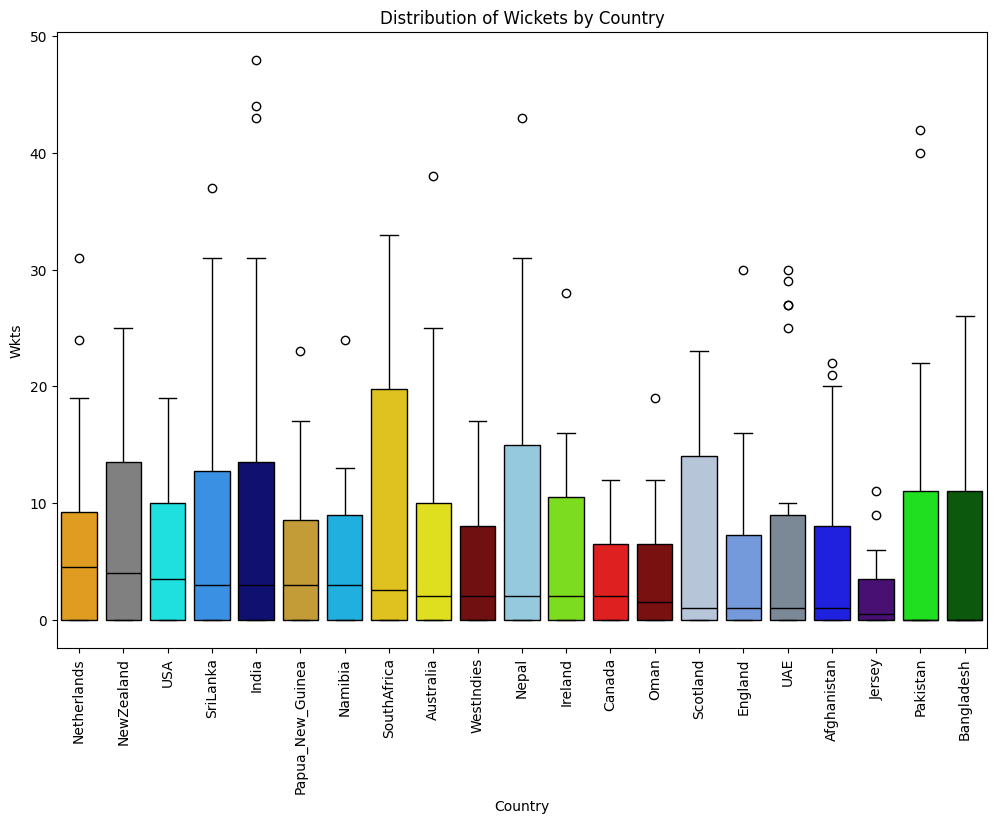

In [51]:

sorted_countries = combined_data.groupby('Country')['Wkts'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Wkts', data=combined_data, palette=team_colors, order=sorted_countries)
plt.title('Distribution of Wickets by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()


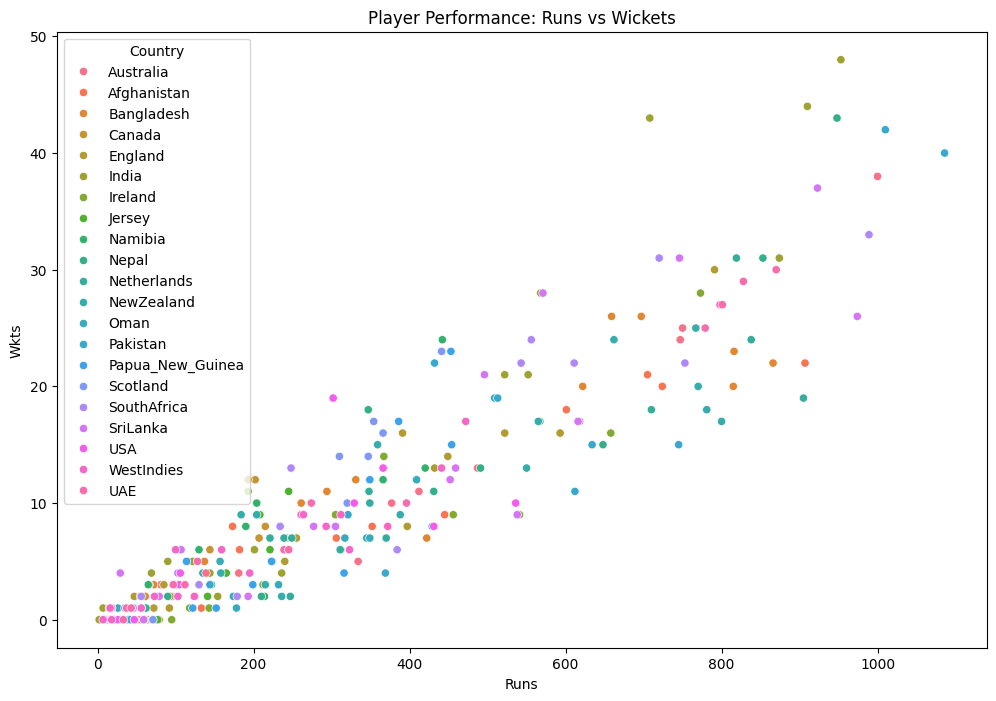

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Runs', y='Wkts', hue='Country', data=combined_data)
plt.title('Player Performance: Runs vs Wickets')
plt.show()


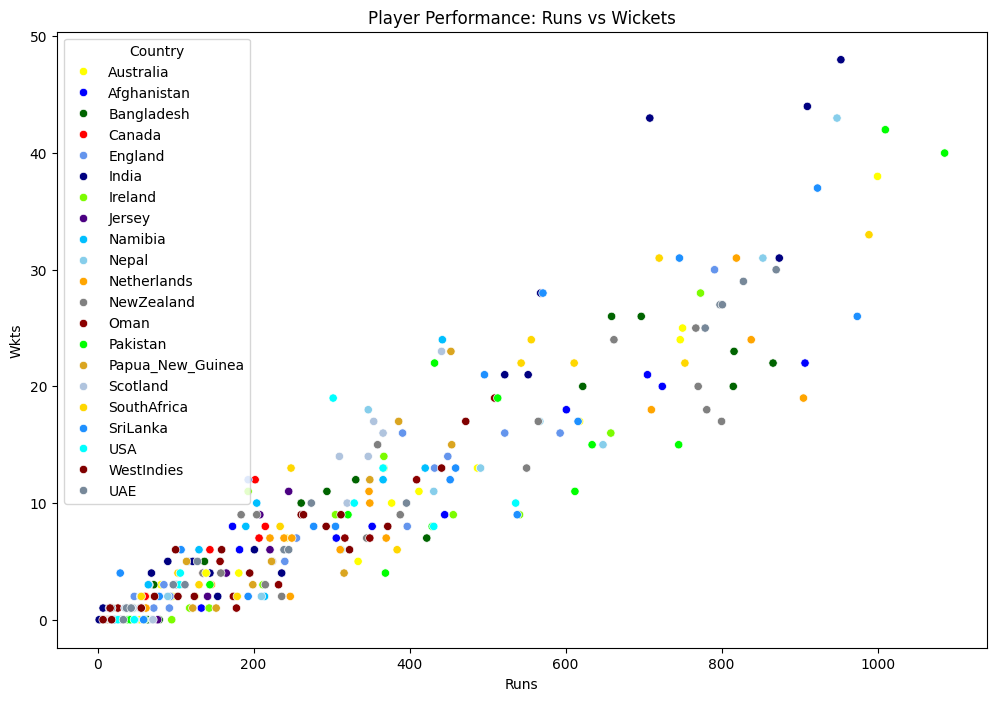

In [53]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Runs', y='Wkts', hue='Country', data=combined_data, palette=team_colors)
plt.title('Player Performance: Runs vs Wickets')
plt.show()


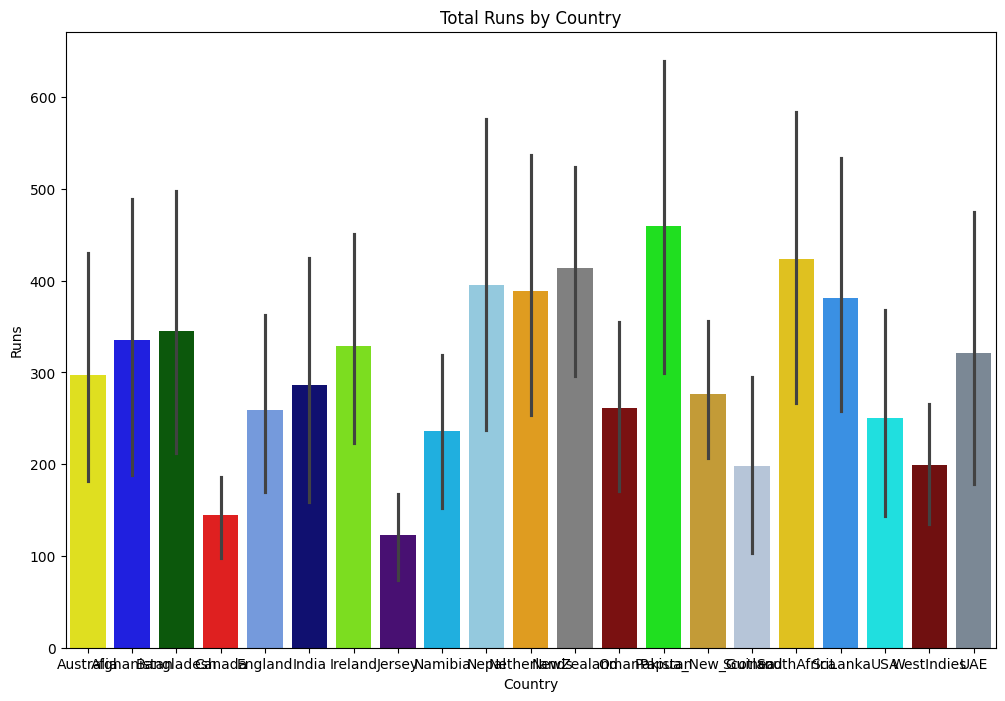

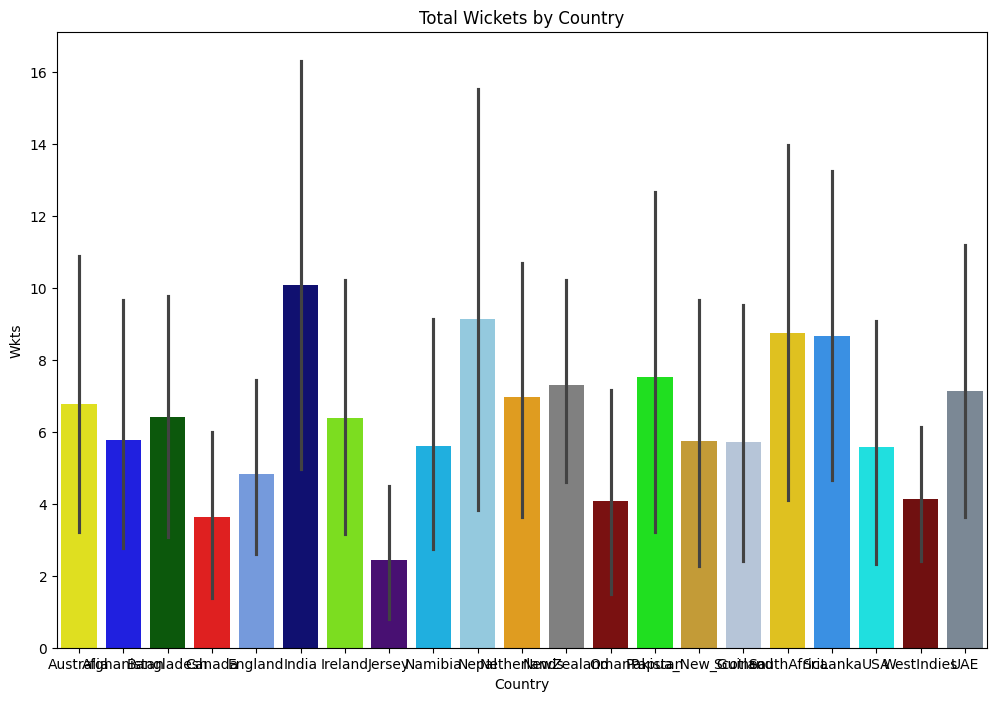

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Runs', data=combined_data, palette=team_colors)
plt.title('Total Runs by Country')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Wkts', data=combined_data, palette=team_colors)
plt.title('Total Wickets by Country')
plt.show()


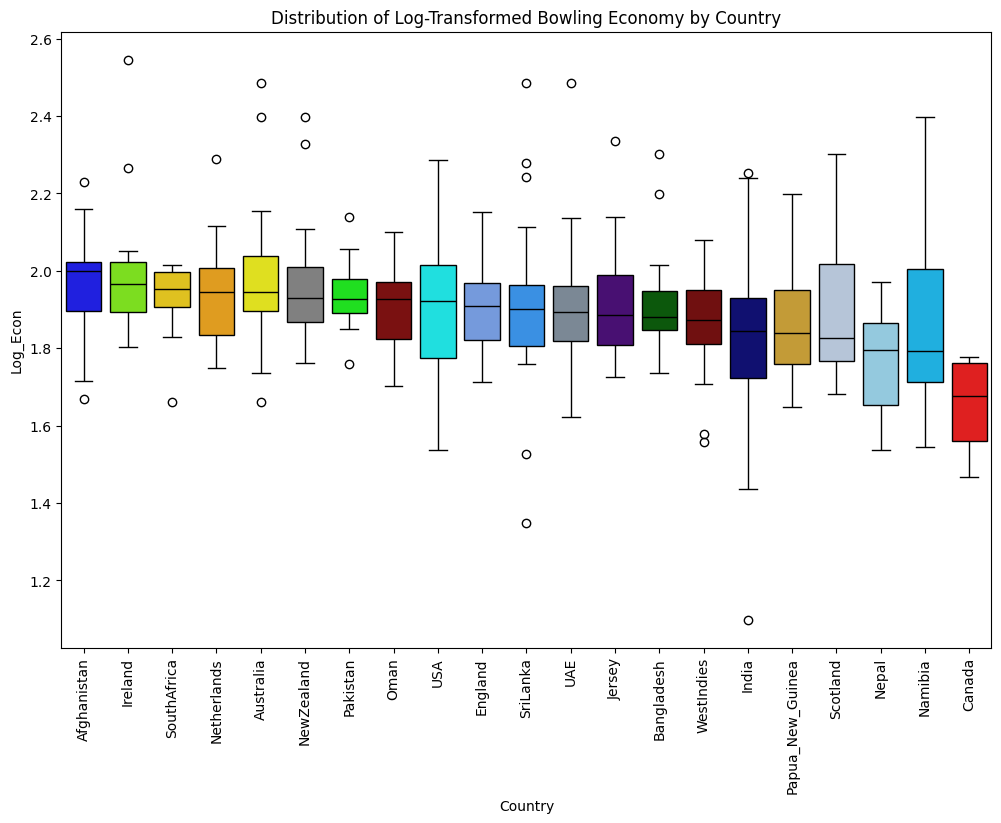

In [55]:
# Convert 'Econ' column to numeric, handling errors by setting them to NaN
combined_data['Econ'] = pd.to_numeric(combined_data['Econ'], errors='coerce')

# Log-transform the 'Econ' values
combined_data['Log_Econ'] = np.log1p(combined_data['Econ'])

# Create a box plot for log-transformed Bowling Economy
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Log_Econ', data=combined_data, palette=team_colors, order=combined_data.groupby('Country')['Log_Econ'].median().sort_values(ascending=False).index)
plt.title('Distribution of Log-Transformed Bowling Economy by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()


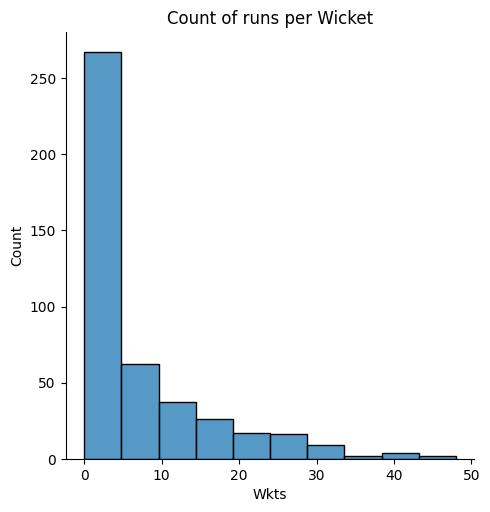

In [56]:
sns.displot(combined_data['Wkts'],kde=False,bins=10)
plt.title('Count of runs per Wicket')
plt.show()

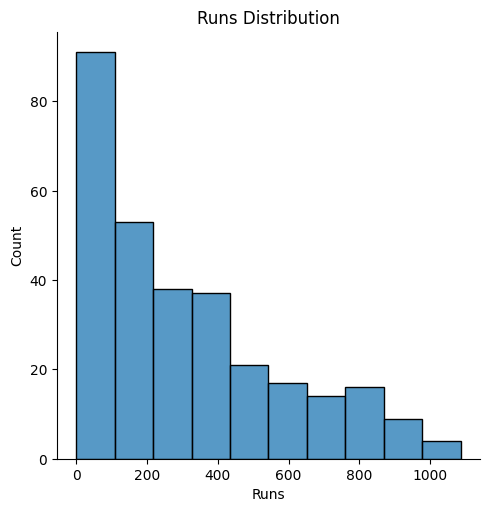

In [57]:
sns.displot(combined_data['Runs'],kde=False,bins=10)
plt.title('Runs Distribution')
plt.show()

In [58]:
combined_data.columns

Index(['Player', 'Mat', 'Inns', 'Overs', 'Mdns', 'Runs', 'Wkts', 'BBI', 'Ave',
       'Econ', 'SR', '5', '10', 'Ct', 'St', 'Type', 'Name', 'Age',
       'Batting style', 'Bowling style', 'Role', 'Arm',
       'Consolidated_Bowling_Style', 'BF', 'HS', 'Team 1', 'Team 2', 'Winner',
       'Margin', 'Wins', 'Country', 'Log_Econ'],
      dtype='object')

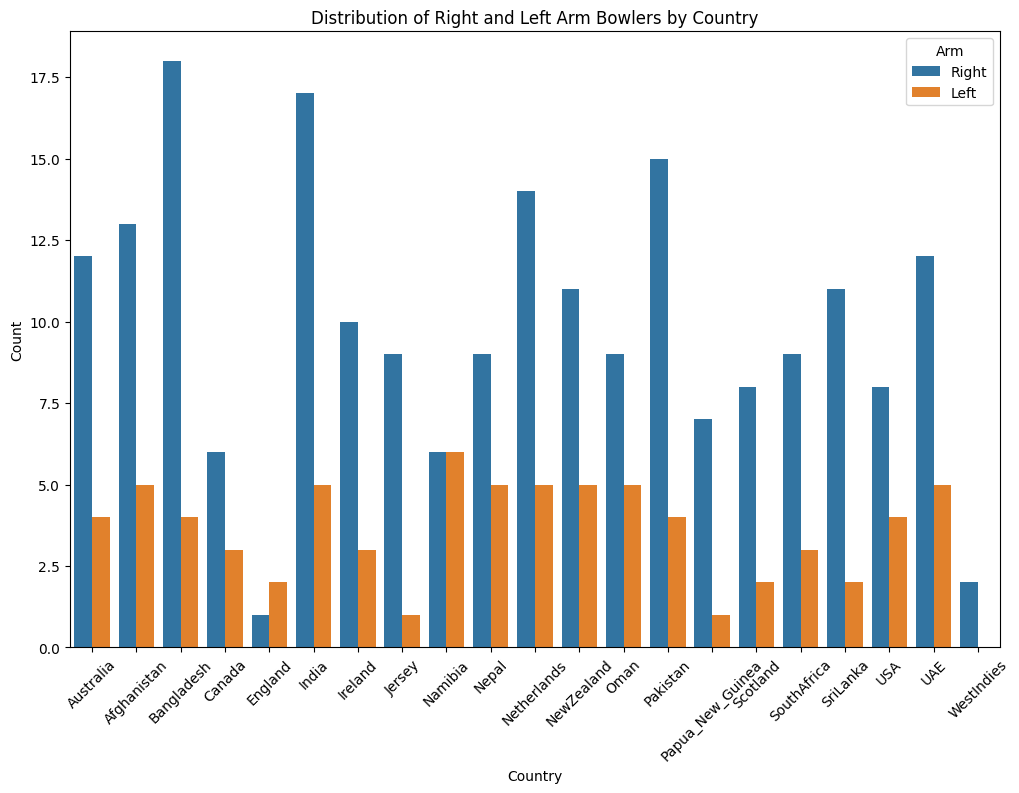

In [59]:
# Filter the data for 'Right' and 'Left' arm bowlers
filtered_data = combined_data[combined_data['Arm'].isin(['Right', 'Left'])]

# Create the countplot
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', hue='Arm', data=filtered_data)
plt.title('Distribution of Right and Left Arm Bowlers by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Arm')
plt.show()



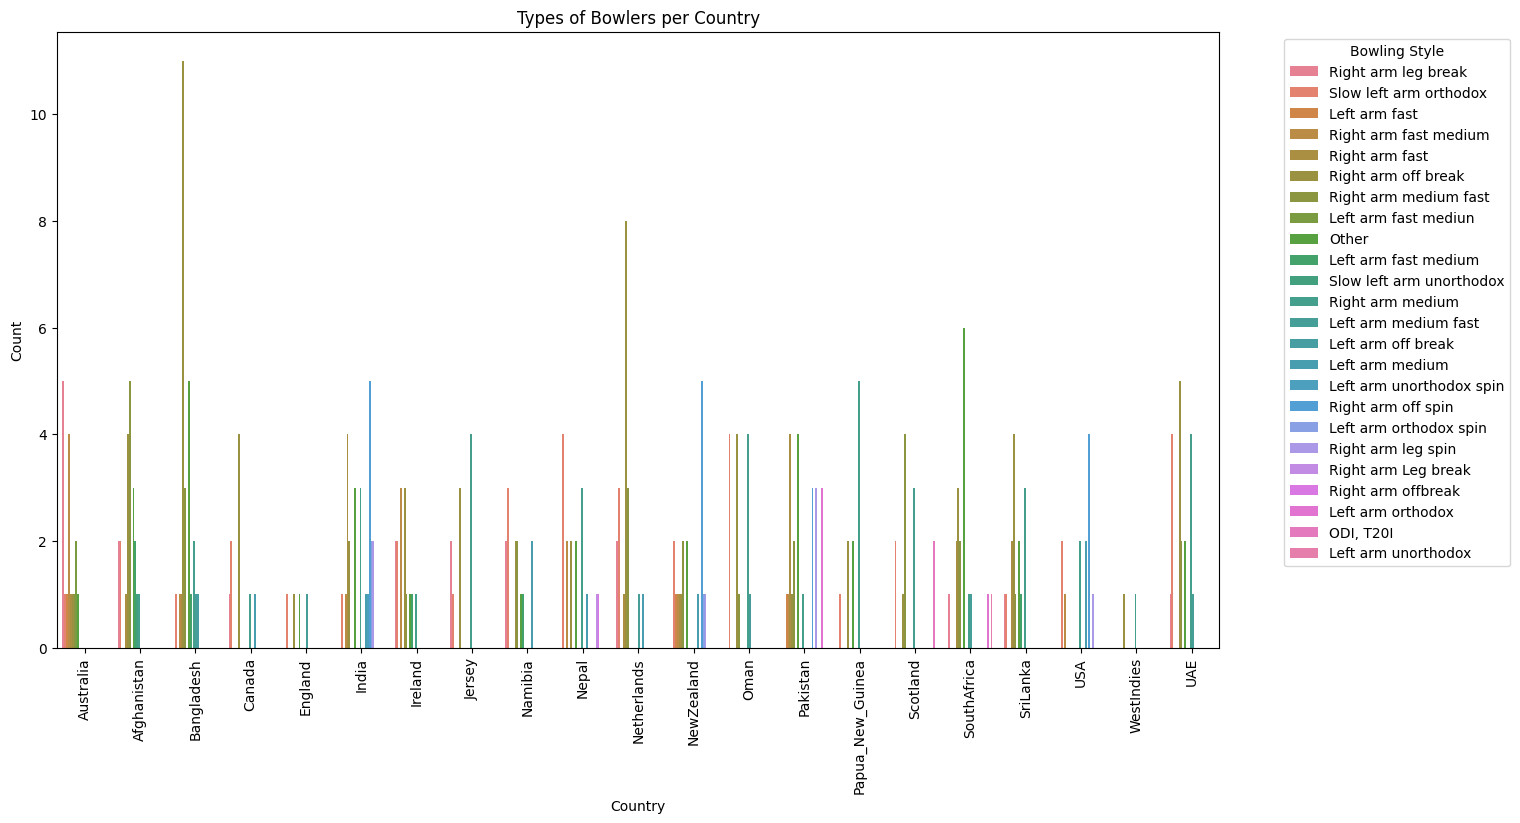

In [60]:

plt.figure(figsize=(15, 8))
sns.countplot(x='Country', hue='Bowling style', data=combined_data)
plt.title('Types of Bowlers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend(title='Bowling Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


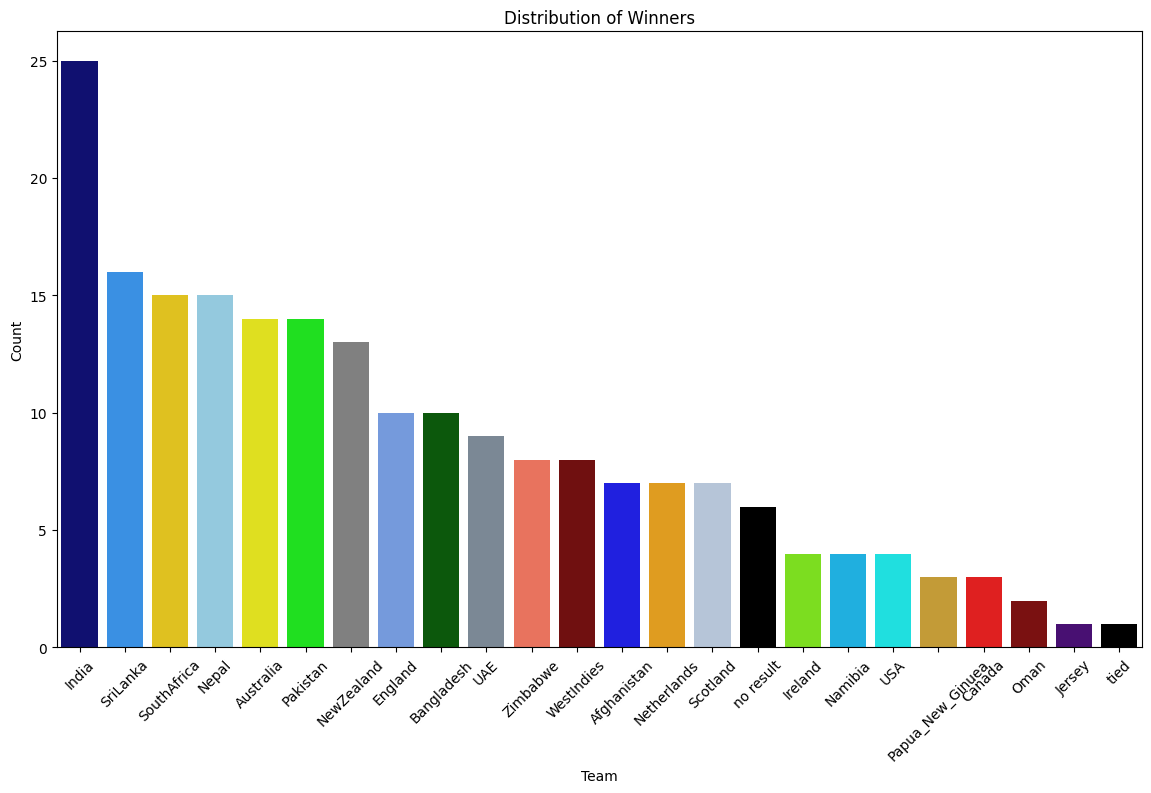

In [61]:

plt.figure(figsize=(14, 8))
sns.countplot(x='Winner', data=Match_Results, order=Match_Results['Winner'].value_counts().index, palette=team_colors)
plt.title('Distribution of Winners')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# Assuming you have a DataFrame named 'all_batters' with the relevant columns
# Modify the column names as per your actual dataset

# Openers
openers_criteria = (all_batters['Batting Average'] > 35) & \
                   (all_batters['Strike Rate'] > 90) & \
                   (all_batters['Innings Batted'] > 15) & \
                   (all_batters['Boundry %'] > 40) & \
                   (all_batters['Batting Position'] < 3)

openers = all_batters[openers_criteria]

# Anchors / Middle
anchors_criteria = (all_batters['Batting Average'] > 40) & \
                    (all_batters['Strike Rate'] > 85) & \
                    (all_batters['Innings Batted'] > 20) & \
                    (all_batters['Av Balls faced'] > 25) & \
                    (all_batters['Boundry %'] > 35) & \
                    (all_batters['Batting Position'] > 3)

anchors = all_batters[anchors_criteria]

# Finisher / Lower (Batting All Rounder)
finisher_criteria = (all_batters['Batting Average'] > 30) & \
                    (all_batters['Strike Rate'] > 100) & \
                    (all_batters['Innings Batted'] > 10) & \
                    (all_batters['Av Balls faced'] > 15) & \
                    (all_batters['Batting Position'] > 5) & \
                    (all_batters['Innings Bowled'] > 5)

finishers = all_batters[finisher_criteria]

# All Rounders / Lower
all_rounders_criteria = (all_batters['Batting Average'] > 25) & \
                        (all_batters['Strike Rate'] > 90) & \
                        (all_batters['Innings Batted'] > 10) & \
                        (all_batters['Batting Position'] > 5) & \
                        (all_batters['Innings Bowled'] > 10) & \
                        (all_batters['Bowling Economy'] < 6.5) & \
                        (all_batters['Bowling Strike Rate'] < 25)

all_rounders = all_batters[all_rounders_criteria]

# Fast Bowlers
fast_bowlers_criteria = (all_batters['Innings Bowled'] > 15) & \
                        (all_batters['Bowling Economy'] < 6) & \
                        (all_batters['Bowling Strike Rate'] < 20) & \
                        (all_batters['Bowling Style'].str.contains('Fast')) & \
                        (all_batters['Bowling Average'] < 25) & \
                        (all_batters['Dot Ball %'] > 35)

fast_bowlers = all_batters[fast_bowlers_criteria]

